In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
import tensorflow as tf

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\IMDB Dataset.csv\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
sentiment_mapping = {'positive': 1, 'negative': 0}

In [4]:
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
df.shape

(50000, 2)

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().any()

True

In [9]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(49582, 2)

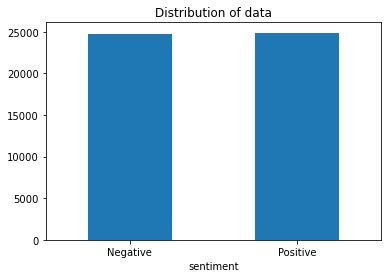

In [12]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax = ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [13]:
df['sentiment'].value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

In [14]:
pip install --upgrade keras tensorflow


  Using cached keras-3.0.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached rich-13.7.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)
  Using cached dm_tree-0.1.8-cp39-cp39-win_amd64.whl (101 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.17.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten,Conv1D, GlobalMaxPooling1D, Dense, LSTM
from tensorflow.keras.activations import relu, sigmoid
from sklearn.pipeline import Pipeline


In [16]:
def preprocess_text(text):
    """function that take text input and apply below operation to clean the text.
    1. removing special characters
    2. create token from the text input and get lowercase
    3. remove stopwords as per NLTK stopwords library
    4. using PorterStemmer for stemming the token
    5. combine all tokens back to text 
    6. return the processed text"""
    
    text = re.sub(r'<[^>]+>', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [PorterStemmer().stem(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text.lower()

df['review'] = df['review'].apply(preprocess_text)

In [17]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

In [18]:
# Tokenization and padding
max_words = 3000  #tokenizer will consider only the top 1000 most frequent words in the training data 
max_seq_length = 100  #maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['review'])

X_train = tokenizer.texts_to_sequences(train_df['review'])
X_test = tokenizer.texts_to_sequences(test_df['review'])
vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, maxlen=max_seq_length, padding = 'post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

CNN MODEL

In a text Convolutional Neural Network (CNN) for natural language processing (NLP), the embedding dimension is a crucial parameter that determines the size of the vector space in which words or tokens are represented. Here's why the embedding dimension is important in text CNNs:

Semantic Representation: Words are converted into dense vectors in an embedding space, where the distance and direction between vectors encode semantic relationships. The embedding dimension controls the size of these vectors. A higher embedding dimension allows the model to capture more nuanced semantic relationships, but it also increases the computational complexity.

Model Capacity: The embedding dimension contributes to the overall capacity of the model. A larger embedding dimension increases the number of parameters in the model. If the embedding dimension is too small, the model might struggle to capture complex relationships in the data. On the other hand, an excessively large embedding dimension may lead to overfitting, especially when the amount of training data is limited.

Generalization: The choice of embedding dimension can impact how well the model generalizes to unseen data. A well-chosen embedding dimension allows the model to generalize better by learning meaningful representations that can be applied to a wide range of examples.

Computational Efficiency: The size of the embedding dimension affects the computational efficiency of the model. Larger embedding dimensions lead to more computations during training and inference. Therefore, the choice of embedding dimension is often a trade-off between model performance and computational efficiency.

Memory Usage: The embedding dimension also influences the memory requirements of the model. Models with higher embedding dimensions consume more memory, which is an important consideration, especially in resource-constrained environments.

Creating neural network embeddings involves training a neural network to learn distributed representations of words or phrases from a given dataset. 

In [19]:
# Build the CNN model

embedding_dim=200
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=5, activation=relu))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
    




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          11926200  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12062649 (46.02 MB)
Trainable params: 12062649 (46.02 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [20]:
# Train the model
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


620/620 [==============================] - 83s 130ms/step - loss: 0.3883 - accuracy: 0.8168 - val_loss: 0.2985 - val_accuracy: 0.8677
Epoch 2/10
620/620 [==============================] - 82s 132ms/step - loss: 0.1769 - accuracy: 0.9331 - val_loss: 0.3316 - val_accuracy: 0.8613
Epoch 3/10
620/620 [==============================] - 81s 131ms/step - loss: 0.0424 - accuracy: 0.9888 - val_loss: 0.4055 - val_accuracy: 0.8693
Epoch 4/10
620/620 [==============================] - 80s 129ms/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.4790 - val_accuracy: 0.8764
Epoch 5/10
620/620 [==============================] - 80s 130ms/step - loss: 7.8281e-04 - accuracy: 1.0000 - val_loss: 0.5281 - val_accuracy: 0.8760
Epoch 6/10
620/620 [==============================] - 81s 130ms/step - loss: 2.2138e-04 - accuracy: 1.0000 - val_loss: 0.5523 - val_accuracy: 0.8746
Epoch 7/10
620/620 [==============================] - 80s 130ms/step - loss: 1.2855e-04 - accuracy: 1.0000 - val_loss: 0

In [21]:
test_predictions=model.predict(X_test)
binary_predictions = (test_predictions > 0.5).astype(int)

775/775 [==============================] - 6s 7ms/step


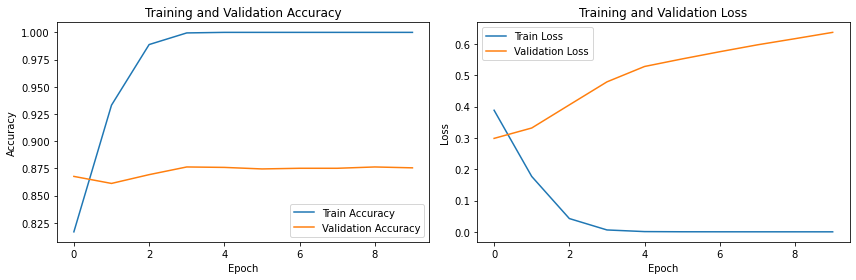

In [30]:
plt.figure(figsize=(12, 4))

# Plot Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Test Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
binary_predictions

In [22]:
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Print model summary
print("\nModel Summary:")
model.summary()

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     12316
           1       0.87      0.88      0.88     12475

    accuracy                           0.87     24791
   macro avg       0.87      0.87      0.87     24791
weighted avg       0.87      0.87      0.87     24791


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          11926200  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)      

In [23]:
test_df['predictions']=binary_predictions

In [24]:
test_df.head()

,review,sentiment,predictions
29171,`` soul plane '' horribl attempt comedi appeal...,0,0
43589,"guest futur tell fascin stori time travel , fr...",1,1
38712,`` nation treasur '' ( 2004 ) thoroughli misgu...,0,1
16045,"ok. first said , want check whether movi avera...",0,0
5248,"n't alway fan , show grew . n't season 5 start...",1,1


RNN MODEL

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, LSTM


# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
rnn_model.add(SimpleRNN(128, activation='relu'))


rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the RNN model on the test set
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test, batch_size=batch_size)
print("RNN Test Accuracy:", rnn_test_accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          11926200  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               42112     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11976633 (45.69 MB)
Trainable params: 11976633 (45.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
620/620 [==============================] - 85s 133ms/step - loss: 0.6647 - accuracy: 0.5705 - val_loss: 0.6553 - val_accuracy: 0.5711

In [26]:
test_predictions=rnn_model.predict(X_test)
binary_predictions_r = (test_predictions > 0.5).astype(int)

775/775 [==============================] - 9s 12ms/step


In [27]:
print("Classification Report:")
print(classification_report(y_test, binary_predictions_r))

# Print model summary
print("\nModel Summary:")
model.summary()

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.27      0.40     12316
           1       0.56      0.93      0.70     12475

    accuracy                           0.60     24791
   macro avg       0.68      0.60      0.55     24791
weighted avg       0.68      0.60      0.55     24791


Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          11926200  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)      

In [28]:
test_df['predictions_rnn']=binary_predictions
test_df.head()

,review,sentiment,predictions,predictions_rnn
29171,`` soul plane '' horribl attempt comedi appeal...,0,0,0
43589,"guest futur tell fascin stori time travel , fr...",1,1,1
38712,`` nation treasur '' ( 2004 ) thoroughli misgu...,0,1,1
16045,"ok. first said , want check whether movi avera...",0,0,0
5248,"n't alway fan , show grew . n't season 5 start...",1,1,1
